In [ ]:
import numpy as np 
import pandas as pd
pd.options.display.max_rows = 10
np.set_printoptions(precision = 4, suppress = True)

import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize = (50, 35))
%matplotlib inline

In [ ]:
# Preparing the BMI dataframe.

In [ ]:
bmi_df = pd.read_csv('complete_bmi.csv')
bmi_df = bmi_df.rename(columns = {'Unnamed: 0' : 'Country', '2016': 'BMI_2016', '2015' : 'BMI_2015'})
bmi_df = bmi_df.drop(index = [0, 1, 2])

In [ ]:
nulls_2016 = bmi_df[bmi_df['BMI_2016'] == 'No data'].index
bmi_df.drop(nulls_2016, inplace = True)

In [ ]:
nulls_2015 = bmi_df[bmi_df['BMI_2015'] == 'No data'].index
bmi_df.drop(nulls_2015, inplace = True)

In [ ]:
bmi_df = bmi_df.reset_index(drop = True)

In [ ]:
def split_strings(strings):
    split_list = []
    for string in strings:
        split_list.extend(string.split(' '))
    return split_list

def get_bmi_values(compl_list):
    even_list = []
    for i in range(len(compl_list)):
        if (i % 2 == 0):
            even_list.append(compl_list[i])
    return even_list

bmis_2016 = [pd.to_numeric(i) for i in get_bmi_values(split_strings(bmi_df.BMI_2016))]
bmis_2015 = [pd.to_numeric(i) for i in get_bmi_values(split_strings(bmi_df.BMI_2015))]

In [ ]:
bmi_data = bmi_df[['Country']].copy()
bmi_data['BMI_2016'] = bmis_2016
bmi_data['BMI_2015'] = bmis_2015

In [ ]:
bmi_data['BMI_change'] = (bmi_data['BMI_2016'] - bmi_data['BMI_2015']) / bmi_data['BMI_2015'] * 100

In [ ]:
bmi_data

,Country,BMI_2016,BMI_2015,BMI_change
0,Afghanistan,23.4,23.3,0.429185
1,Albania,26.7,26.6,0.375940
2,Algeria,25.5,25.5,0.000000
3,Andorra,26.7,26.7,0.000000
4,Angola,23.3,23.2,0.431034
...,...,...,...,...
186,Venezuela (Bolivarian Republic of),26.7,26.7,0.000000
187,Viet Nam,21.9,21.7,0.921659
188,Yemen,23.8,23.7,0.421941
189,Zambia,22.6,22.5,0.444444


In [ ]:
# Preparing the Happiness Score dataframes.

In [ ]:
happiness_2016 = '2016.csv'
happiness_2015 = '2015.csv'

h_2016 = pd.read_csv(happiness_2016)
h_2015 = pd.read_csv(happiness_2015)

In [ ]:
# Specify region of the world for which we want to visualize the data
region = "Western Europe" # make string empty for worldwide data

In [ ]:
happiness_data = h_2016[['Country', 'Region']].copy()

In [ ]:
happiness_data['Happiness_Score_2016'] = h_2016['Happiness Score']
happiness_data['Happiness_Score_2015'] = h_2015['Happiness Score']
happiness_data['Happiness_Score_Change'] = (happiness_data['Happiness_Score_2016'] - happiness_data['Happiness_Score_2015']) / happiness_data['Happiness_Score_2015'] * 100

In [ ]:
happiness_data['GDP_2016'] = h_2016['Economy (GDP per Capita)']
happiness_data['GDP_2015'] = h_2015['Economy (GDP per Capita)']
happiness_data['GDP_Change'] = (happiness_data['GDP_2016'] - happiness_data['GDP_2015']) / happiness_data['GDP_2015'] 

In [ ]:
happiness_data['Life_Expectancy_2016'] = h_2016['Health (Life Expectancy)']
happiness_data['Life_Expectancy_2015'] = h_2015['Health (Life Expectancy)']
happiness_data['Life_Expectancy_Change'] = (happiness_data['Life_Expectancy_2016'] - happiness_data['Life_Expectancy_2015']) / happiness_data['Life_Expectancy_2015']

In [ ]:
happiness_data = happiness_data[happiness_data['Region'].str.contains(region)]

In [ ]:
happiness_data

,Country,Region,Happiness_Score_2016,Happiness_Score_2015,Happiness_Score_Change,GDP_2016,GDP_2015,GDP_Change,Life_Expectancy_2016,Life_Expectancy_2015,Life_Expectancy_Change
0,Denmark,Western Europe,7.526,7.587,-0.804007,1.44178,1.39651,0.032417,0.79504,0.94143,-0.155497
1,Switzerland,Western Europe,7.509,7.561,-0.687740,1.52733,1.30232,0.172776,0.86303,0.94784,-0.089477
2,Iceland,Western Europe,7.501,7.527,-0.345423,1.42666,1.32548,0.076335,0.86733,0.87464,-0.008358
3,Norway,Western Europe,7.498,7.522,-0.319064,1.57744,1.45900,0.081179,0.79579,0.88521,-0.101016
4,Finland,Western Europe,7.413,7.427,-0.188501,1.40598,1.32629,0.060085,0.81091,0.90563,-0.104590
...,...,...,...,...,...,...,...,...,...,...,...
49,Italy,Western Europe,5.977,5.948,0.487559,1.35495,1.25114,0.082972,0.85102,0.95446,-0.108375
61,North Cyprus,Western Europe,5.771,5.759,0.208370,1.31141,1.08254,0.211419,0.84142,0.78805,0.067724
68,Cyprus,Western Europe,5.546,5.589,-0.769368,1.31857,0.80148,0.645169,0.84880,0.63132,0.344485
93,Portugal,Western Europe,5.123,4.971,3.057735,1.27607,0.08308,14.359533,0.79363,0.09131,7.691600


In [ ]:
# Merging the BMI data and the Happiness data.

In [ ]:
df = pd.merge(bmi_data, happiness_data, on = 'Country')

In [ ]:
df

,Country,BMI_2016,BMI_2015,BMI_change,Region,Happiness_Score_2016,Happiness_Score_2015,Happiness_Score_Change,GDP_2016,GDP_2015,GDP_Change,Life_Expectancy_2016,Life_Expectancy_2015,Life_Expectancy_Change
0,Austria,25.6,25.5,0.392157,Western Europe,7.119,7.226,-1.480764,1.45038,0.95578,0.517483,0.80565,0.86027,-0.063492
1,Belgium,26.1,26.1,0.000000,Western Europe,6.929,6.940,-0.158501,1.42539,1.33596,0.066941,0.81959,0.89533,-0.084595
2,Cyprus,26.8,26.8,0.000000,Western Europe,5.546,5.589,-0.769368,1.31857,0.80148,0.645169,0.84880,0.63132,0.344485
3,Denmark,25.3,25.3,0.000000,Western Europe,7.526,7.587,-0.804007,1.44178,1.39651,0.032417,0.79504,0.94143,-0.155497
4,Finland,25.9,25.9,0.000000,Western Europe,7.413,7.427,-0.188501,1.40598,1.32629,0.060085,0.81091,0.90563,-0.104590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,Norway,26.7,26.6,0.375940,Western Europe,7.498,7.522,-0.319064,1.57744,1.45900,0.081179,0.79579,0.88521,-0.101016
15,Portugal,25.6,25.7,-0.389105,Western Europe,5.123,4.971,3.057735,1.27607,0.08308,14.359533,0.79363,0.09131,7.691600
16,Spain,25.9,26.0,-0.384615,Western Europe,6.361,6.302,0.936211,1.34253,1.20740,0.111918,0.87896,0.88721,-0.009299
17,Sweden,26.0,26.0,0.000000,Western Europe,7.291,7.284,0.096101,1.45181,1.33358,0.088656,0.83121,0.93156,-0.107723


In [ ]:
# Visualizing the data.

In [ ]:
# The GDP and the Life Expecancy variable implies how much it contributes to the Happiness Score.

Text(0, 0.5, 'Change')

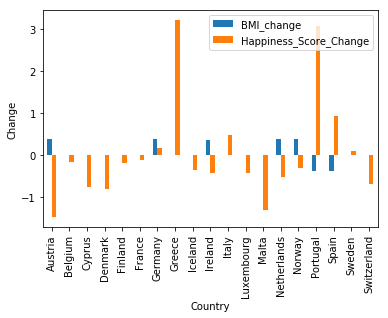

In [ ]:
data1 = df[['Country', 'BMI_change', 'Happiness_Score_Change']].copy()
data1.set_index("Country", drop = True, inplace = True)
data1.plot.bar()
plt.xlabel('Country')
plt.ylabel('Change')

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,BMI_2016,BMI_2015,BMI_change,Happiness_Score_2016,Happiness_Score_2015,Happiness_Score_Change,GDP_2016,GDP_2015,GDP_Change,Life_Expectancy_2016,Life_Expectancy_2015,Life_Expectancy_Change
BMI_2016,1,1,0.27,-0.23,-0.22,0.063,-0.078,-0.073,-0.15,-0.22,-0.14,-0.13
BMI_2015,1,1,0.19,-0.28,-0.27,0.11,-0.12,-0.11,-0.11,-0.19,-0.17,-0.094
BMI_change,0.27,0.19,1,0.48,0.5,-0.5,0.46,0.36,-0.46,-0.37,0.39,-0.48
Happiness_Score_2016,-0.23,-0.28,0.48,1,1,-0.71,0.7,0.82,-0.54,0.048,0.75,-0.55
Happiness_Score_2015,-0.22,-0.27,0.5,1,1,-0.75,0.7,0.82,-0.55,0.05,0.76,-0.56
Happiness_Score_Change,0.063,0.11,-0.5,-0.71,-0.75,1,-0.51,-0.67,0.63,-0.13,-0.7,0.63
GDP_2016,-0.078,-0.12,0.46,0.7,0.7,-0.51,1,0.68,-0.37,0.11,0.49,-0.37
GDP_2015,-0.073,-0.11,0.36,0.82,0.82,-0.67,0.68,1,-0.79,0.29,0.93,-0.79
GDP_Change,-0.15,-0.11,-0.46,-0.54,-0.55,0.63,-0.37,-0.79,1,-0.31,-0.88,1
Life_Expectancy_2016,-0.22,-0.19,-0.37,0.048,0.05,-0.13,0.11,0.29,-0.31,1,0.33,-0.29


Text(0.5, 1.0, 'Happiness Score and GDP (2015) - Western Europe')

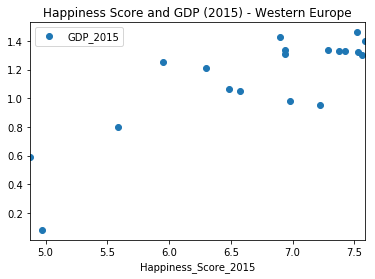

In [ ]:
df.plot(x='Happiness_Score_2015', y='GDP_2015', style='o') # change to 2016 for those plots
plt.title('Happiness Score and GDP (2015) - Western Europe') # remove 'western europe' when plotting worldwide data

Text(0.5, 1.0, 'Happiness Score and GDP (2015) - Western Europe')

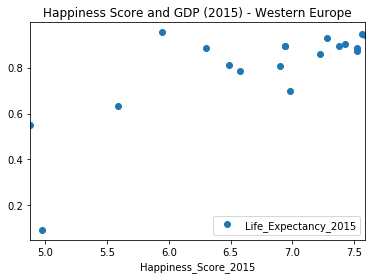

In [ ]:
df.plot(x='Happiness_Score_2015', y='Life_Expectancy_2015', style='o') # change to 2016 for those plots
plt.title('Happiness Score and GDP (2015) - Western Europe') # remove 'western europe' when plotting worldwide data

Text(0.5, 1.0, 'Happiness Score and GDP (2015) - Western Europe')

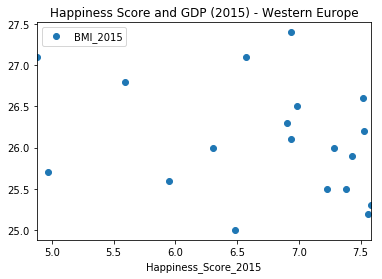

In [ ]:
df.plot(x='Happiness_Score_2015', y='BMI_2015', style='o') # change to 2016 for those plots
plt.title('Happiness Score and GDP (2015) - Western Europe') # remove 'western europe' when plotting worldwide data

Text(0.5, 1.0, 'Change in % from 2015 to 2016')

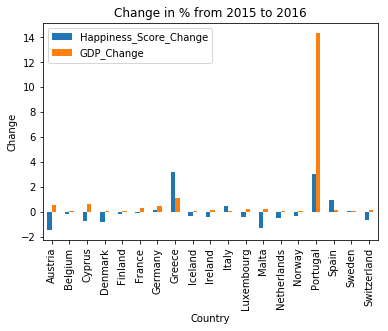

In [ ]:
data2 = df[['Country', 'Happiness_Score_Change', 'GDP_Change']].copy()
data2.set_index("Country", drop = True, inplace = True)
data2.plot.bar()
plt.xlabel('Country')
plt.ylabel('Change')
plt.title('Change in % from 2015 to 2016')

Text(0.5, 1.0, 'Change in % from 2015 to 2016')

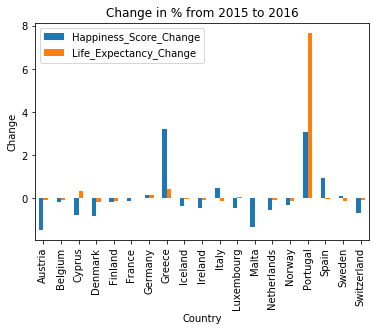

In [ ]:
data3 = df[['Country', 'Happiness_Score_Change', 'Life_Expectancy_Change']].copy()
data3.set_index("Country", drop = True, inplace = True)
data3.plot.bar()
plt.xlabel('Country')
plt.ylabel('Change')
plt.title('Change in % from 2015 to 2016')